<a href="https://colab.research.google.com/github/shahd1995913/Tahalf-Mechine-Learning-DS3/blob/main/Tasks/ML1_S1%26S2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML1-S1&S2 (Assignment)
----

## Problem 1:  Linear Regression
---

Assume that during a three hour period spent outside a person recorded the temperature and their water consumption. The experiment was conducted on 7 randomly selected days during the summer.

**Here is the data:**

Day Temp: 98,83,95,74,90,84,82.

Water consumed oz: 48,27,48,16,32,25,20.

- Calculate the linear regression equation .

- Does it have positive or negative correlation?

Estimated coefficients slope b1 is 1.480569049271322
Estimated coefficients intercept b0 is -97.31783483691729
------------------------------------------------------------
linear regression equation is y_pred =  1.480569049271322 *X + -97.31783483691729
------------------------------------------------------------
squared error is 74.34455239417065
mean squared error is 10.620650342024378
root mean square error is 3.2589339272259537
R square is 0.9238941405733848
Positive correlation
------------------------------------------------------------


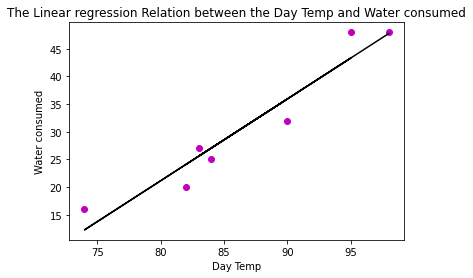

In [22]:

"""
Phase 1 : Calculate the linear regression equation . Done 

"""

"""
Phase 2 : Does it have positive or negative correlation? 
---- > positive correlation  due  two variables move in the same direction between Day Temp and the Water consumed . Done 

"""
 # Import library 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Define Data
x = np.array([98,83,95,74,90,84,82])
y = np.array([48,27,48,16,32,25,20])
n = np.size(x)
  
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean

print('Estimated coefficients slope b1 is', b1)
print('Estimated coefficients intercept b0 is', b0)
print('------------------------------------------------------------')
y_pred = b1 * x + b0
print("linear regression equation is y_pred = ", b1, "*X" ,"+", b0)  
print('------------------------------------------------------------')


error = y - y_pred
se = np.sum(error**2)
print('squared error is', se)
  
mse = se/n 
print('mean squared error is', mse)
  
rmse = np.sqrt(mse)
print('root mean square error is', rmse)
  
SSt = np.sum((y - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)

x = x.reshape(-1,1)
regression_model = LinearRegression()
  
# Fit the data(train the model)
regression_model.fit(x, y)
  
# Predict
y_predicted = regression_model.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)

print("Positive correlation")
plt.scatter(x, y, color = 'm')
plt.plot(x, y_pred, color = 'black')
plt.xlabel('Day Temp')
plt.ylabel('Water consumed')
plt.title("The Linear regression Relation between the Day Temp and Water consumed")
print('------------------------------------------------------------')

## Problem 2:  Linear Regression
---
We want to predict the CO2 emission of a car , A csv file contains the data is provided **`cars.csv`** : 
- Clean the data and explain what you have done.
- Build a linear regression model on this data.
- Predict the CO2 emission of a car where the weight is 2555, and the volume is 1300cm3.
- Do we care about the car brand while using this model ? and why ?.

In [23]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
random_val = 123
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [24]:
# Read the csv file , Please change the path for dataset_path
dataset_path = '/content/cars.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Toyota,camry,1200,"9,22",99
4,Fiat,500,900,865,90


In [25]:
# To Clean the data First ---> Find if there is  Nan or Empty data in rows and --->  check the shape of data
# and the description  and the ---> find statistical relationship by finding the mean and min and a max of our CSV data file
import csv 
def row_factory(row):
    return [x if x != '' else 'NaN' for x in row]

with open(dataset_path, 'r', newline='') as f:
    reader = csv.reader(f, delimiter=';')
    for row in reader:
        print(row_factory(row))

['Car,Model,Volume,Weight,CO2']
['Toyoty,Aygo,1000,790,99']
['Mitsubishi,Space Star,1200,1160,95']
['Skoda,Citigo,1000,929,95']
['Toyota,camry,1200,"9,22",99']
['Fiat,500,900,865,90']
['Mini,Cooper,1500,1140,105']
['VW,Up!,1000,929,105']
['Skoda,Fabia,1400,1109,90']
['Mercedes,A-Class,1500,1365,92']
['Ford,Fiesta,1500,1112,98']
['Audi,A1,1600,1150,99']
['Hyundai,I20,1100,980,99']
['Suzuki,Swift,1300,990,101']
['Ford,Fiesta,1000,1112,99']
['Honda,Civic,1600,1252,94']
['Hundai,I30,1600,1326,97']
['Opel,Astra,1600,1330,97']
['Toyota,corolla,gx,1320,95']
['BMW,1,1600,1365,99']
['Mazda,3,2200,1280,104']
['Skoda,Rapid,1600,1119,104']
['Ford,Focus,2000,1328,105']
['Ford,Mondeo,1600,1584,94']
['Opel,Insignia,2000,1428,99']
['Mercedes,C-Class,2100,1365,99']
['Skoda,Octavia,1600,1415,99']
['Volvo,S60,2000,1415,99']
['Mercedes,CLA,1500,1465,102']
['Audi,A4,2000,1490,104']
['Audi,A6,2000,1725,114']
['Nissan,sunny,9000,1750,115']
['Volvo,V70,1600,1523,109']
['BMW,5,2000,1705,114']
['Mercedes,E-Clas

In [26]:
dataset.shape

(39, 5)

In [27]:
dataset.describe()
df = dataset.copy()
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Toyota,camry,1200,"9,22",99
4,Fiat,500,900,865,90
5,Mini,Cooper,1500,1140,105
6,VW,Up!,1000,929,105
7,Skoda,Fabia,1400,1109,90
8,Mercedes,A-Class,1500,1365,92
9,Ford,Fiesta,1500,1112,98


In [30]:
# Also To clean data in the columns called Volume there is a string 
# --> To solve this replace the string with  the most repeted value in this columns by finding the mode
print("The most repeted value in Volume columns  is :",df["Volume"].mode())

# Replace the gx with mode 
df["Volume"].replace({"gx": "1600"}, inplace=True)


# Clean Data by Also ---->  remove the comma  in '9,22' value in Weight
df["Weight"].replace({"9,22": "922"}, inplace=True)

The most repeted value in Volume columns  is : 0    1600
dtype: object


In [31]:
#Setting the value for X and Y
x = df[['Volume', 'Weight']]
y = df['CO2']

In [32]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


In [33]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [34]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  77.9296499113706
Coefficients:


[('Volume', 0.0008943535748811775), ('Weight', 0.016776279088782604)]

In [35]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [102.26023659 101.37086501 102.93128775  92.07726397 103.56844318
  94.40916676 103.45679197  97.78663843 104.91088868 106.73372036
 105.93424171 102.67964356]


In [36]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr.astype(int)})
mlr_diff.head()

,Actual value,Predicted value
18,99,102
19,104,101
37,109,102
0,99,92
38,120,103


In [37]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 34.58
Mean Absolute Error: 7.313052452023867
Mean Square Error: 68.39467543289757
Root Mean Square Error: 8.270107341074695


In [40]:
#  Predict the CO2 emission of a car where the weight is 2555, and the volume is 1300cm3.
weight =2555
volume = 1300
CO2_emission = 78.32308336701146 + weight*0.016268385921062896 + volume*0.0010702551273453148
print("CO2_emission is when the  weight is 2555, and the volume is 1300cm3 :", CO2_emission)
print("----------------------------------------------------------------")
# If you want to test your input data please insert your volume and weight
 
volume = int(input('Please insert the volume  : '))
weight = int(input('Please insert the weight  : '))
CO2_user_input = 78.32308336701146 + weight*0.016268385921062896 + volume*0.0010702551273453148
print("The CO2_emission depend on user input is : ",CO2_user_input)

CO2_emission is when the  weight is 2555, and the volume is 1300cm3 : 121.28014106087608
----------------------------------------------------------------
Please insert the volume  : 1000
Please insert the weight  : 790
The CO2_emission depend on user input is :  92.24536337199648


In [39]:
# - Do we care about the car brand while using this model ? and why ?.
print("Do we care about the car brand while using this model ?","No")
print("No")
print("----------------------------------------------------------------")
print("and why ??","First, because it is Categorical data and not numbers that can not be traded with by a multivariate linear regression(MLR) model that depends on numbers, whether they are integer or float values.")
print("Secondly, if I want to convert it, This  Categorical data have no relationship with each other rows and is different, There is no similarity or redundancy,\nEach row has a different value , even if it is converted into numbers, it will be weakened to (MLR) model because it has no relationship.")


Do we care about the car brand while using this model ? No
No
----------------------------------------------------------------
and why ?? First, because it is Categorical data and not numbers that can not be traded with by a multivariate linear regression(MLR) model that depends on numbers, whether they are integer or float values.
Secondly, if I want to convert it, This  Categorical data have no relationship with each other rows and is different, There is no similarity or redundancy,
Each row has a different value , even if it is converted into numbers, it will be weakened to (MLR) model because it has no relationship.


**To get the answer, we must analyze the data for each car with its model. There is a simple relationship between
 One type of car if the CO2 is almost close to the type of one car**
## 1. When the car is of the same make and model, the CO2 is approximately equal
## 2. But here we have several types of cars and they have different models as well. If we arrange the data for each car and its models, we find that there is a hidden relationship between them.
## 3.  But here in this work we do not need to study these relationships because we depend on two numeric values ​​and they gave us good results

In [43]:
BMW_data = df.loc[df['Car'] == "BMW"]
BMW_data

,Car,Model,Volume,Weight,CO2
18,BMW,1,1600,1365,99
32,BMW,5,2000,1705,114
36,BMW,216,1600,1390,108


In [45]:
Mercedes_data = df.loc[df['Car'] == "Mercedes"]
Mercedes_data

,Car,Model,Volume,Weight,CO2
8,Mercedes,A-Class,1500,1365,92
24,Mercedes,C-Class,2100,1365,99
27,Mercedes,CLA,1500,1465,102
33,Mercedes,E-Class,2100,1605,115
38,Mercedes,SLK,2500,1395,120


In [44]:
Audi_data = df.loc[df['Car'] == "Audi"]
Audi_data

,Car,Model,Volume,Weight,CO2
10,Audi,A1,1600,1150,99
28,Audi,A4,2000,1490,104
29,Audi,A6,2000,1725,114


In [48]:
Toyoty_data = df.loc[df['Car'] == "Toyoty"]
Toyoty_data


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99


In [49]:
Toyota_data = df.loc[df['Car'] == "Toyota"]
Toyota_data


,Car,Model,Volume,Weight,CO2
3,Toyota,camry,1200,922,99
17,Toyota,corolla,1600,1320,95


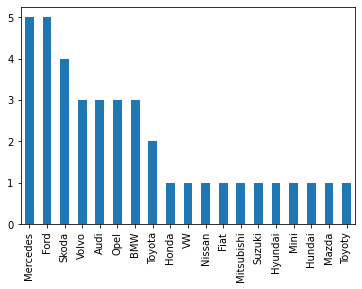

In [50]:
df['Car'].value_counts().plot(kind='bar')

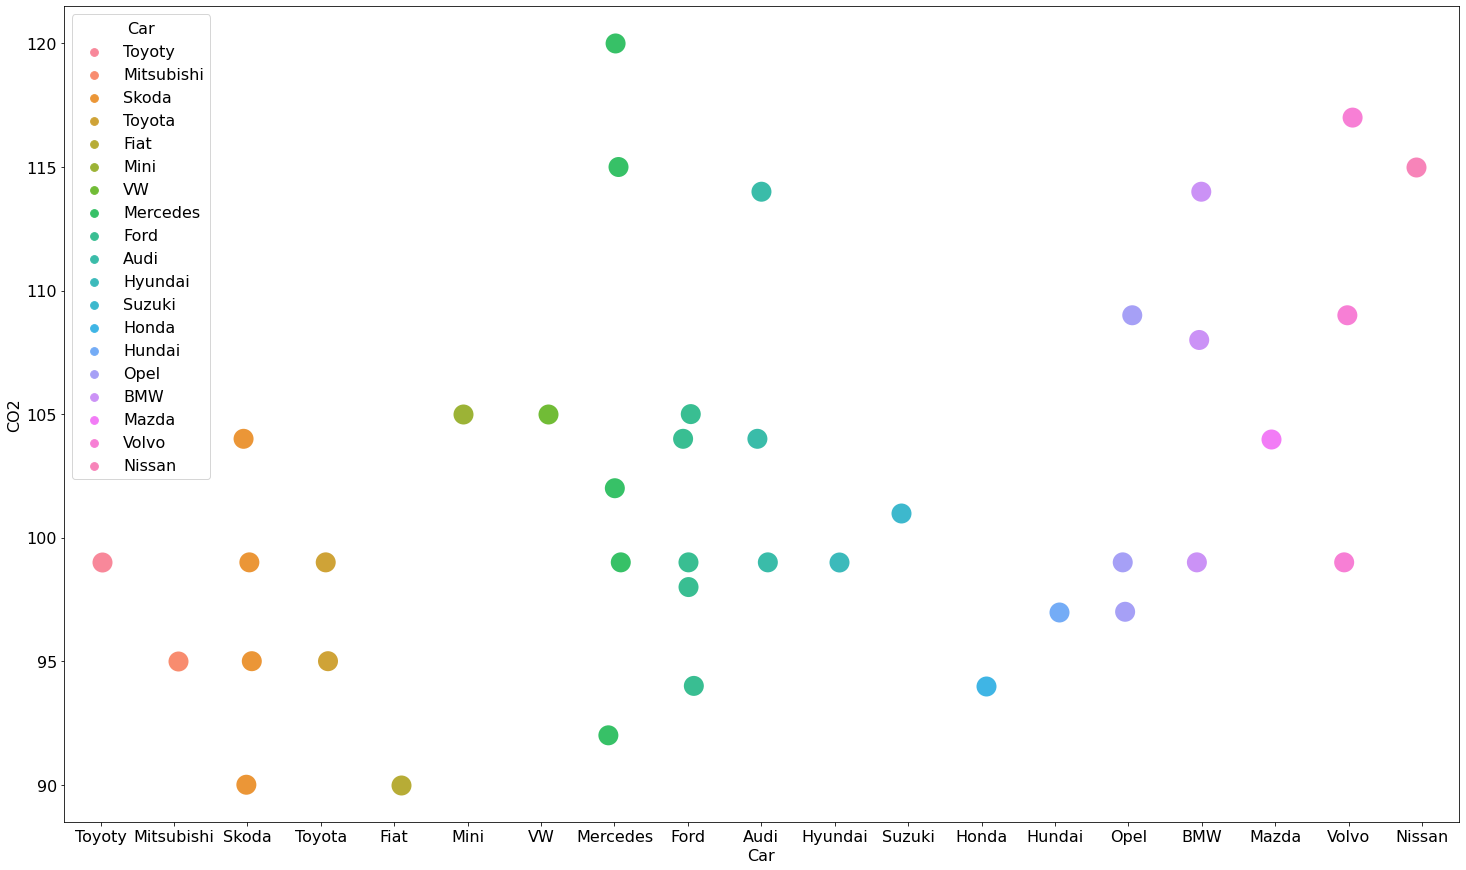

In [71]:
"The relation between the Car Name and the CO2, There is A relation due there is some rendentency "
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,15))
sns.stripplot(x="Car", y="CO2", data=df , hue="Car", size=20) 
